In [1]:
from sklearn.cluster import KMeans # algoritmo de KMenas el que ayuda a clasificar la data
from sklearn import datasets # para pode traer el set de datos de iris
from sklearn import metrics # para poder ver que tan bien aprendio el algoritmo de KMeans
import matplotlib.pyplot as plt # para hacer graficas
import pandas as pd
import mglearn #  para pra procesar la data y ver las graficas
from sklearn.decomposition import PCA
%matplotlib inline 

import numpy as np
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

C:\Users\SOATEC\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\SOATEC\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
iris=datasets.load_iris() # se pasa el set de datos a la variabe iris

In [3]:
X = iris.data #caracteristicas
Y = iris.target #etiquetas

In [12]:
X.shape #muestra el tamano de X (filas,columnas)

(150, 4)

In [13]:
Y[:5] # muestra los primeros 5 elementos de y, target_name

array([0, 0, 0, 0, 0])

In [14]:
iris.keys() #muestra como esta constituido el set de iris

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
iris['target_names'] # muestra los target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
iris['feature_names'] #muestra los features_name

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width','Petal Length','Petal Width'])
y = pd.DataFrame(iris.target, columns = ['Target'])

In [21]:
x.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
y.head(5)

,Target
0,0
1,0
2,0
3,0
4,0


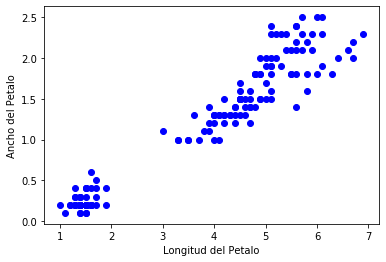

In [32]:
plt.scatter(x['Petal Length'],x['Petal Width'], c='blue')
plt.xlabel('Longitud del Petalo', fontsize=10)
plt.ylabel('Ancho del Petalo', fontsize= 10)
plt.show()

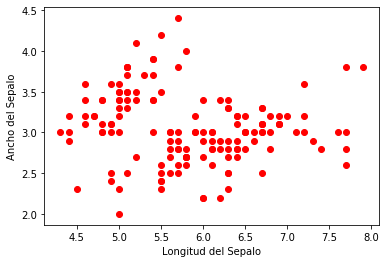

In [33]:
plt.scatter(x['Sepal Length'],x['Sepal Width'], c='red')
plt.xlabel('Longitud del Sepalo', fontsize=10)
plt.ylabel('Ancho del Sepalo', fontsize= 10)
plt.show()

In [79]:
km = KMeans(n_clusters=3,max_iter=1000) # la variable km recibe el algoritmo de KMeans, n_clusters=2 es en cuantos grupos queremos que clasifique el set de datos 

In [80]:
km.fit(X) #se entrena la variabel con X

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [81]:
predicciones=km.predict(X) # esta variable va a tener las predicciones de a que grupo cree q pertence 

In [82]:
predicciones #mustra las prediccione que hizo el algoritmo

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [83]:
score = metrics.adjusted_rand_score(Y, predicciones) # metodo metrics para ver que tan bien aprendio

In [84]:
print (score)

0.7302382722834697


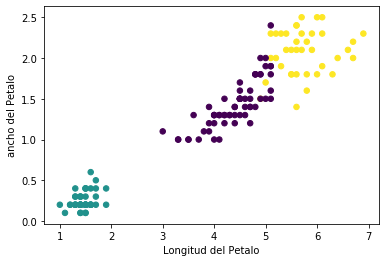

In [85]:
plt.scatter(x['Petal Length'], x['Petal Width'], c = predicciones, s=30)
plt.xlabel('Longitud del Petalo', fontsize =10)
plt.ylabel('ancho del Petalo', fontsize=10)
plt.show()

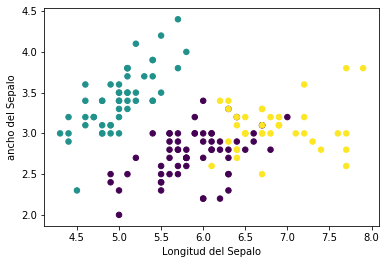

In [86]:
plt.scatter(x['Sepal Length'], x['Sepal Width'], c = predicciones, s=30)
plt.xlabel('Longitud del Sepalo', fontsize =10)
plt.ylabel('ancho del Sepalo', fontsize=10)
plt.show()

de aqui en adelante hare una prueba con pca

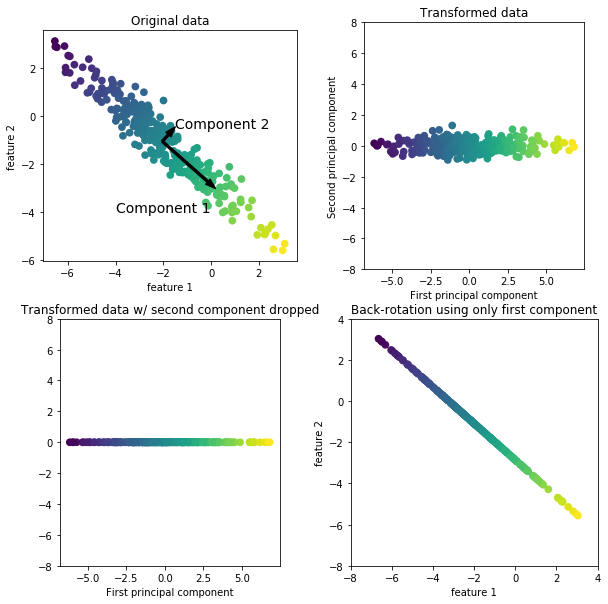

In [3]:
mglearn.plots.plot_pca_illustration() # cargar ejemplo de pca

In [5]:
pca = PCA(n_components=2) # la variable pca recive la funcion pca con 2 comnentes, el compemnte 1 el de mayor varianza y el ortogonal
pca.fit(iris.data) # le damos la data 

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
transformada = pca.transform(iris.data) # genera una transformacion y que lo pase a la variable transformada

In [7]:
print(iris.data.shape) # set de datos original
print(transformada.shape) # forma de la data transformada

(150, 4)
(150, 2)


Text(0, 0.5, 'PCA 2')

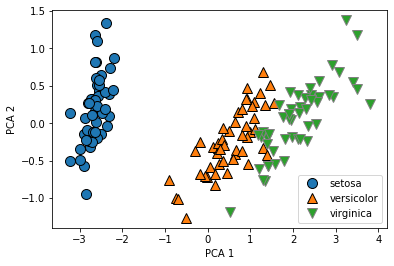

In [8]:
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], iris.target) # graficar la data transformada 
plt.legend(iris.target_names,loc='best')
plt.xlabel('PCA 1') # el componete pricipal se va al eje x
plt.ylabel('PCA 2')

Text(0, 0.5, 'PCA 2')

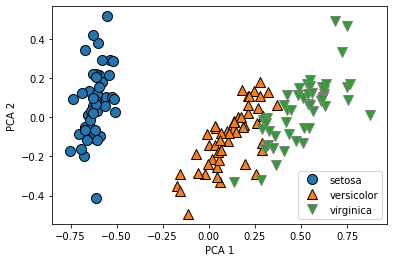

In [9]:
from sklearn.preprocessing import MinMaxScaler # funcion minmaxscaler pone todo en una escalal similar de 0 a 1
escala = MinMaxScaler() # escala recibe al modelo  minmaxscaler
escala.fit(iris.data)
escalada=escala.transform(iris.data) # toma toda la data y lo escala de 0 a 1
pca.fit(escalada)
transformada = pca.transform(escalada)
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], iris.target)
plt.legend(iris.target_names,loc='best')
plt.gca()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [10]:
escalada # muestra la data escalada

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [11]:
iris.data #muestra la data antes de ser escalada

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]


C:\Users\SOATEC\anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


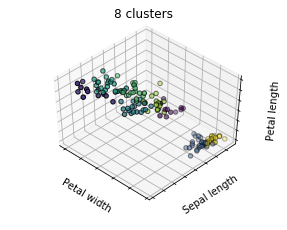

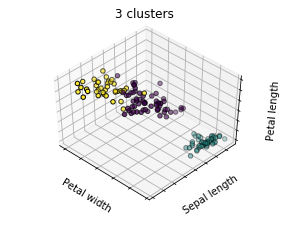

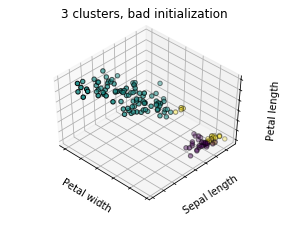

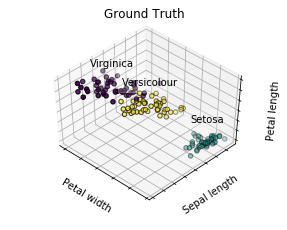

In [10]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
    
# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[Y == label, 3].mean(),
              X[Y == label, 0].mean(),
              X[Y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
Y = np.choose(Y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=Y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()